# Vizualizace 

1. Matplotlib a Seaborn
2. Line, scatter, bar 
3. Histogram, boxplot, regrese
4. Correlation heatmap
5. Sankey
6. Vymyslete vlastní graf

In [2]:
import pandas as pd
import scipy.stats as st

Vizualizaci si ukážeme s knihovnou [`seaborn`](https://seaborn.pydata.org/), která je postavená na [`matplotlib`](https://matplotlib.org/).

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# nastaví vykreslování grafů do notebooku
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 200 # zvětší grafy

In [10]:
pokemon_df = pd.read_csv("../data/Pokemon.csv", index_col="id")

In [11]:
pokemon_df.head()

,name,height,weight,color,shape,is baby,type 1,type 2,hp,attack,defense,sp. attack,sp. defense,speed,total,generation,evolves from,evolution group,fm gender ratio,has_gender_differences
id,,,,,,,,,,,,,,,,,,,,
1,bulbasaur,0.7,6.9,green,quadruped,False,Grass,Poison,45,49,49,65,65,45,318,1,NaN,1,1:7,0
2,ivysaur,1.0,13.0,green,quadruped,False,Grass,Poison,60,62,63,80,80,60,405,1,1.0,1,1:7,0
3,venusaur,2.0,100.0,green,quadruped,False,Grass,Poison,80,82,83,100,100,80,525,1,2.0,1,1:7,1
4,charmander,0.6,8.5,red,upright,False,Fire,NaN,39,52,43,60,50,65,309,1,NaN,2,1:7,0
5,charmeleon,1.1,19.0,red,upright,False,Fire,NaN,58,64,58,80,65,80,405,1,4.0,2,1:7,0


In [12]:
pokemon_df.loc[:,"hp" : "speed"].head()

,hp,attack,defense,sp. attack,sp. defense,speed
id,,,,,,
1,45,49,49,65,65,45
2,60,62,63,80,80,60
3,80,82,83,100,100,80
4,39,52,43,60,50,65
5,58,64,58,80,65,80


In [13]:
pokemon_df["shape"].value_counts()

upright      168
quadruped    151
humanoid     124
wings         72
arms          45
armor         38
ball          37
fish          36
blob          33
squiggle      32
bug-wings     19
legs          19
tentacles     18
heads         15
Name: shape, dtype: int64

K vykreslení grafu stačí většinou vědět jak se v `seaborn` jmenuje, jednoduchý sloupcový graf je `countplot`

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

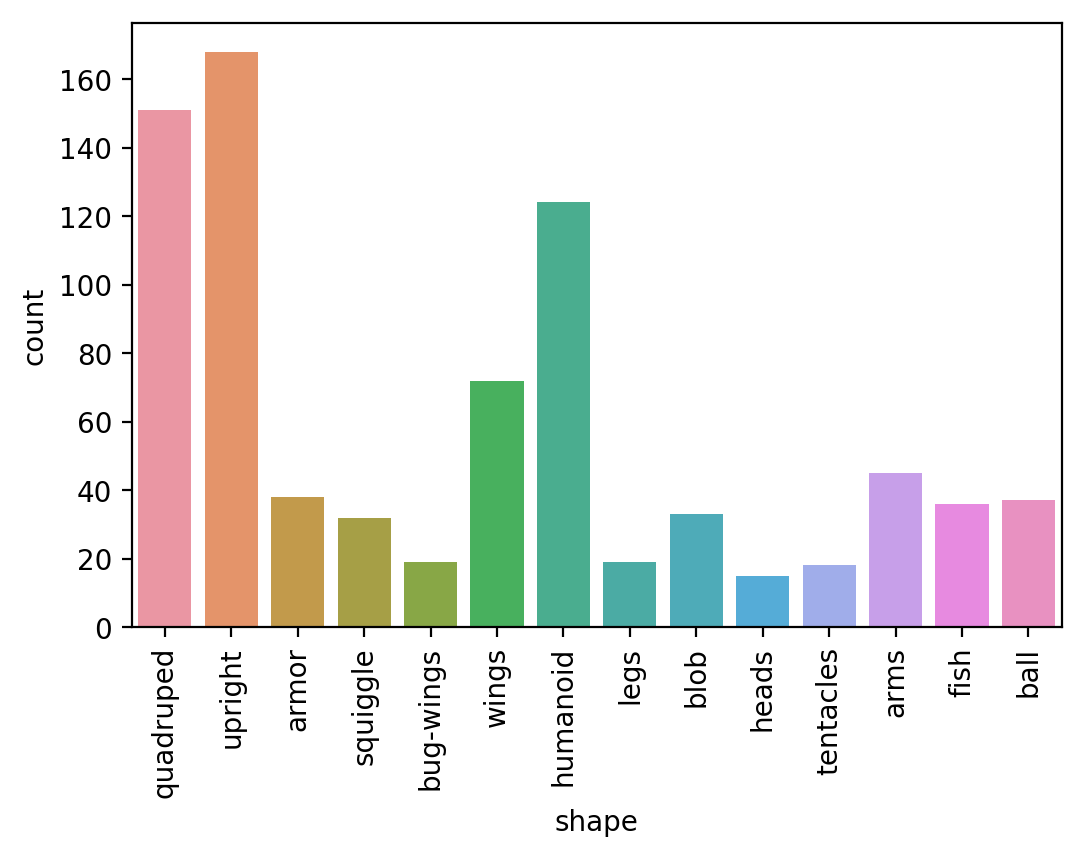

In [14]:
sns.countplot(x="shape", data=pokemon_df)
plt.xticks(rotation=90)

### Boxplot
Boxplot se hodí k vizualizaci několika souborů data vedle sebe:
* krabička (box) ohraničuje 75% kvantily (tedy kvartily),
* fousky (whiskers) označují hranice rozdělení
* čára uprostřed krabičky je *medián*
* diamanty pod a nad fousky označují odlehlé hodnoty (outliers)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

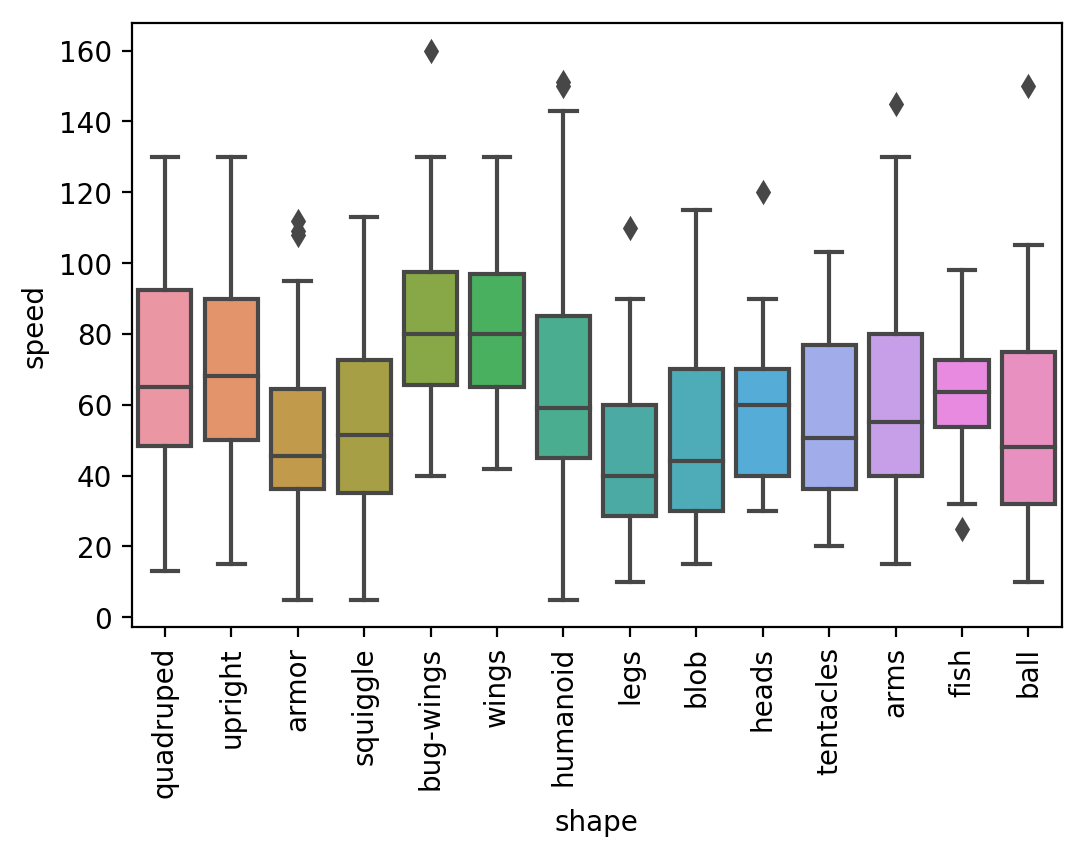

In [18]:
sns.boxplot(x="shape", y="speed", data=pokemon_df)
plt.xticks(rotation=90)
# sns.swarmplot(data=pokemon_df.loc[:, "hp":"speed"]);

V boxplotu lze kombinovat různé soubory, podle různých kritérií.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

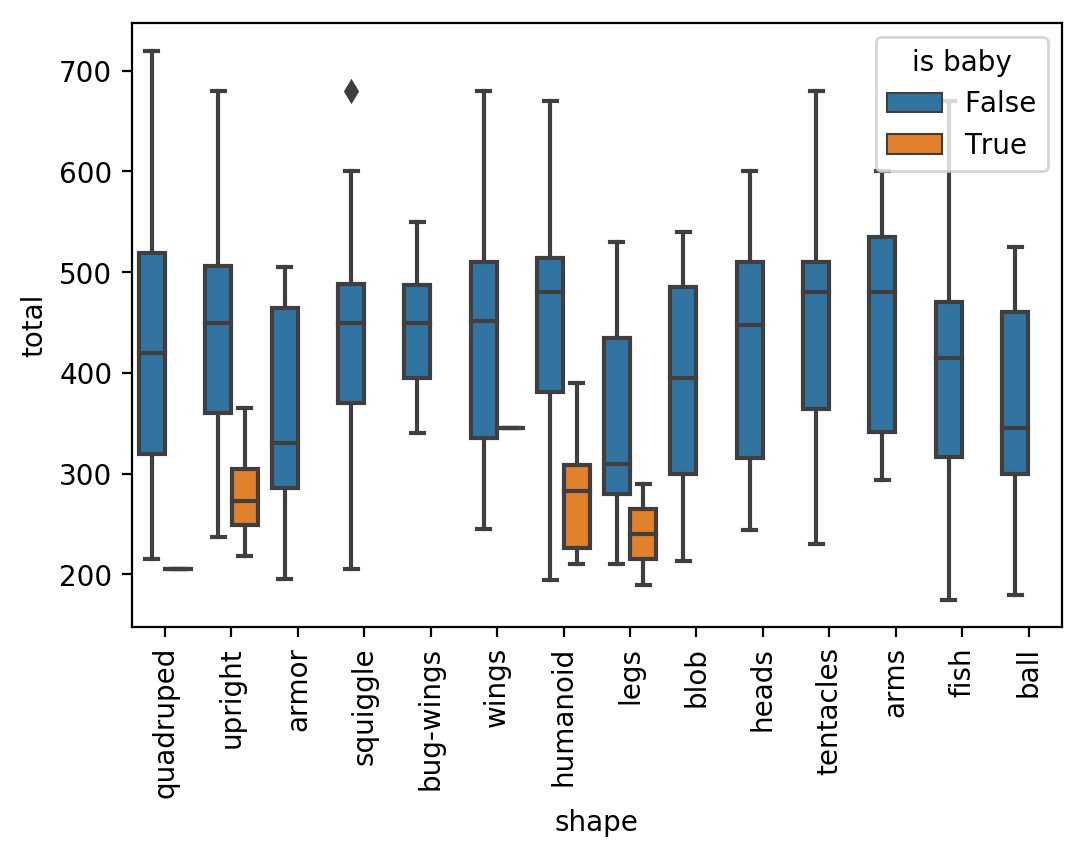

In [21]:
fig, ax = plt.subplots()
hp_shape_boxplot = sns.boxplot(x="shape",
         hue="is baby" ,y="total", data=pokemon_df, ax=ax)
#hp_shape_boxplot.set_xticklabels(rotation=90)
plt.xticks(rotation=90)

Pro zobrazení korelačí matice se hodí `heatmap`

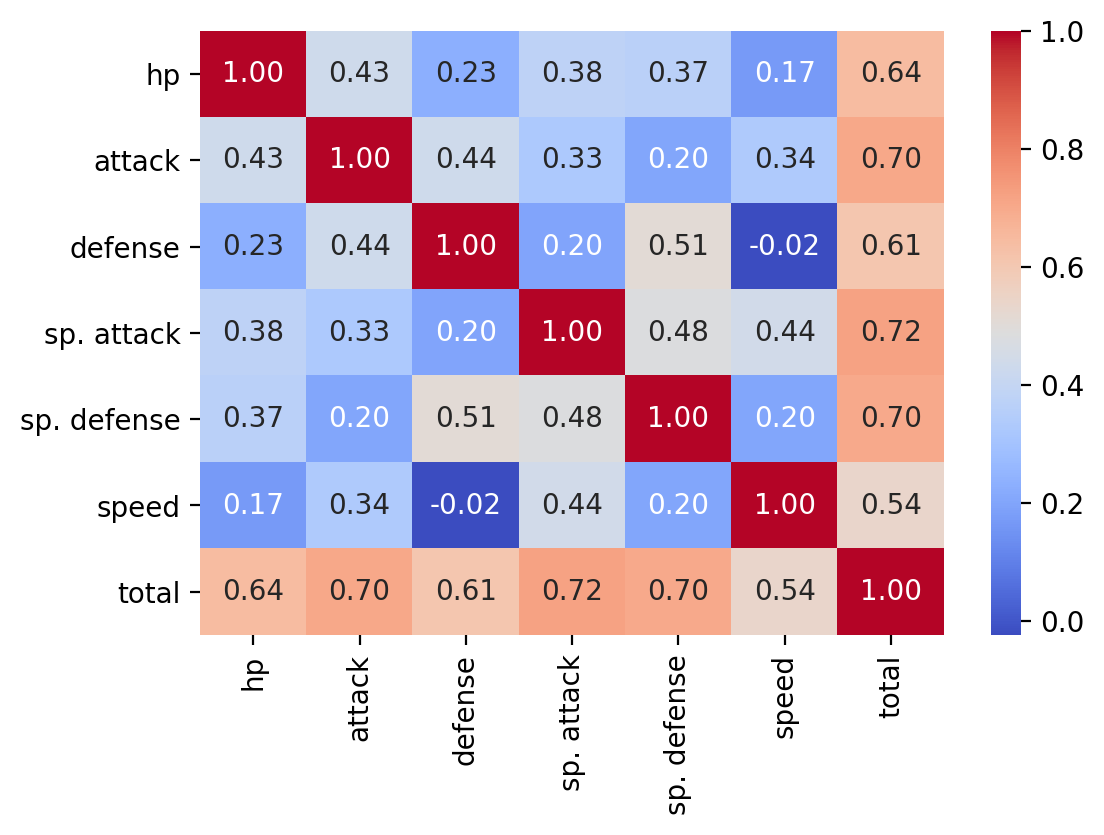

In [22]:
correlations_hp_speed = pokemon_df.loc[:, "hp" : "total"].corr()

sns.heatmap(correlations_hp_speed, 
            cmap="coolwarm", 
            annot=correlations_hp_speed, 
            fmt="1.2f",)

In [11]:
correlations_hp_speed

,hp,attack,defense,sp. attack,sp. defense,speed,total
hp,1.000000,0.433318,0.231540,0.377446,0.367949,0.169512,0.644595
attack,0.433318,1.000000,0.435514,0.325937,0.202138,0.335289,0.704130
defense,0.231540,0.435514,1.000000,0.199560,0.508688,-0.023866,0.609892
sp. attack,0.377446,0.325937,0.199560,1.000000,0.481345,0.440411,0.722103
sp. defense,0.367949,0.202138,0.508688,0.481345,1.000000,0.202847,0.700333
speed,0.169512,0.335289,-0.023866,0.440411,0.202847,1.000000,0.538985
total,0.644595,0.704130,0.609892,0.722103,0.700333,0.538985,1.000000


In [12]:
pokemon_df.loc[:, "hp" : "speed"].head()

,hp,attack,defense,sp. attack,sp. defense,speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80


Distplot už jsme viděly, zobrazí histogram (tedy countplot) a tzv. kernel density estimate (tedy odhad rozdělení hustoty pravděpodobnosti složený z normálních rozdělení jejichž střední hodnoty jsou postuně jednotlivá pozorování) společně s normálním rozdělením o stejné střední odnotě a směrodatné odchylce jako data. 

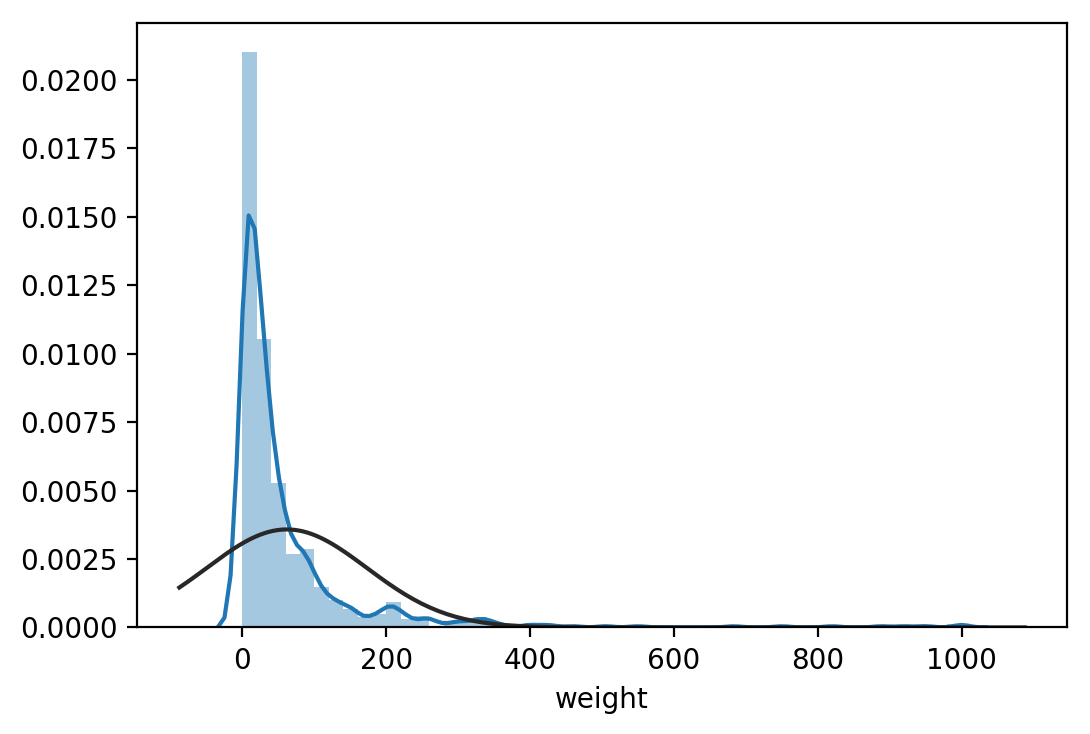

In [23]:
sns.distplot(pokemon_df["weight"], fit=st.norm)

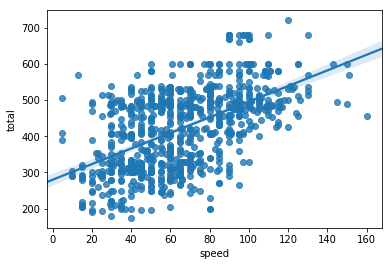

In [14]:
sns.regplot(x="speed", y="total", data=pokemon_df)

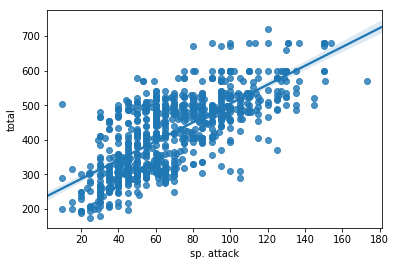

In [15]:
sns.regplot(x="sp. attack", y="total", data=pokemon_df)

Můžeme si ale vymyslet i vlastní graf a pak ho zkusit pomocí seaborn vyrobit.  

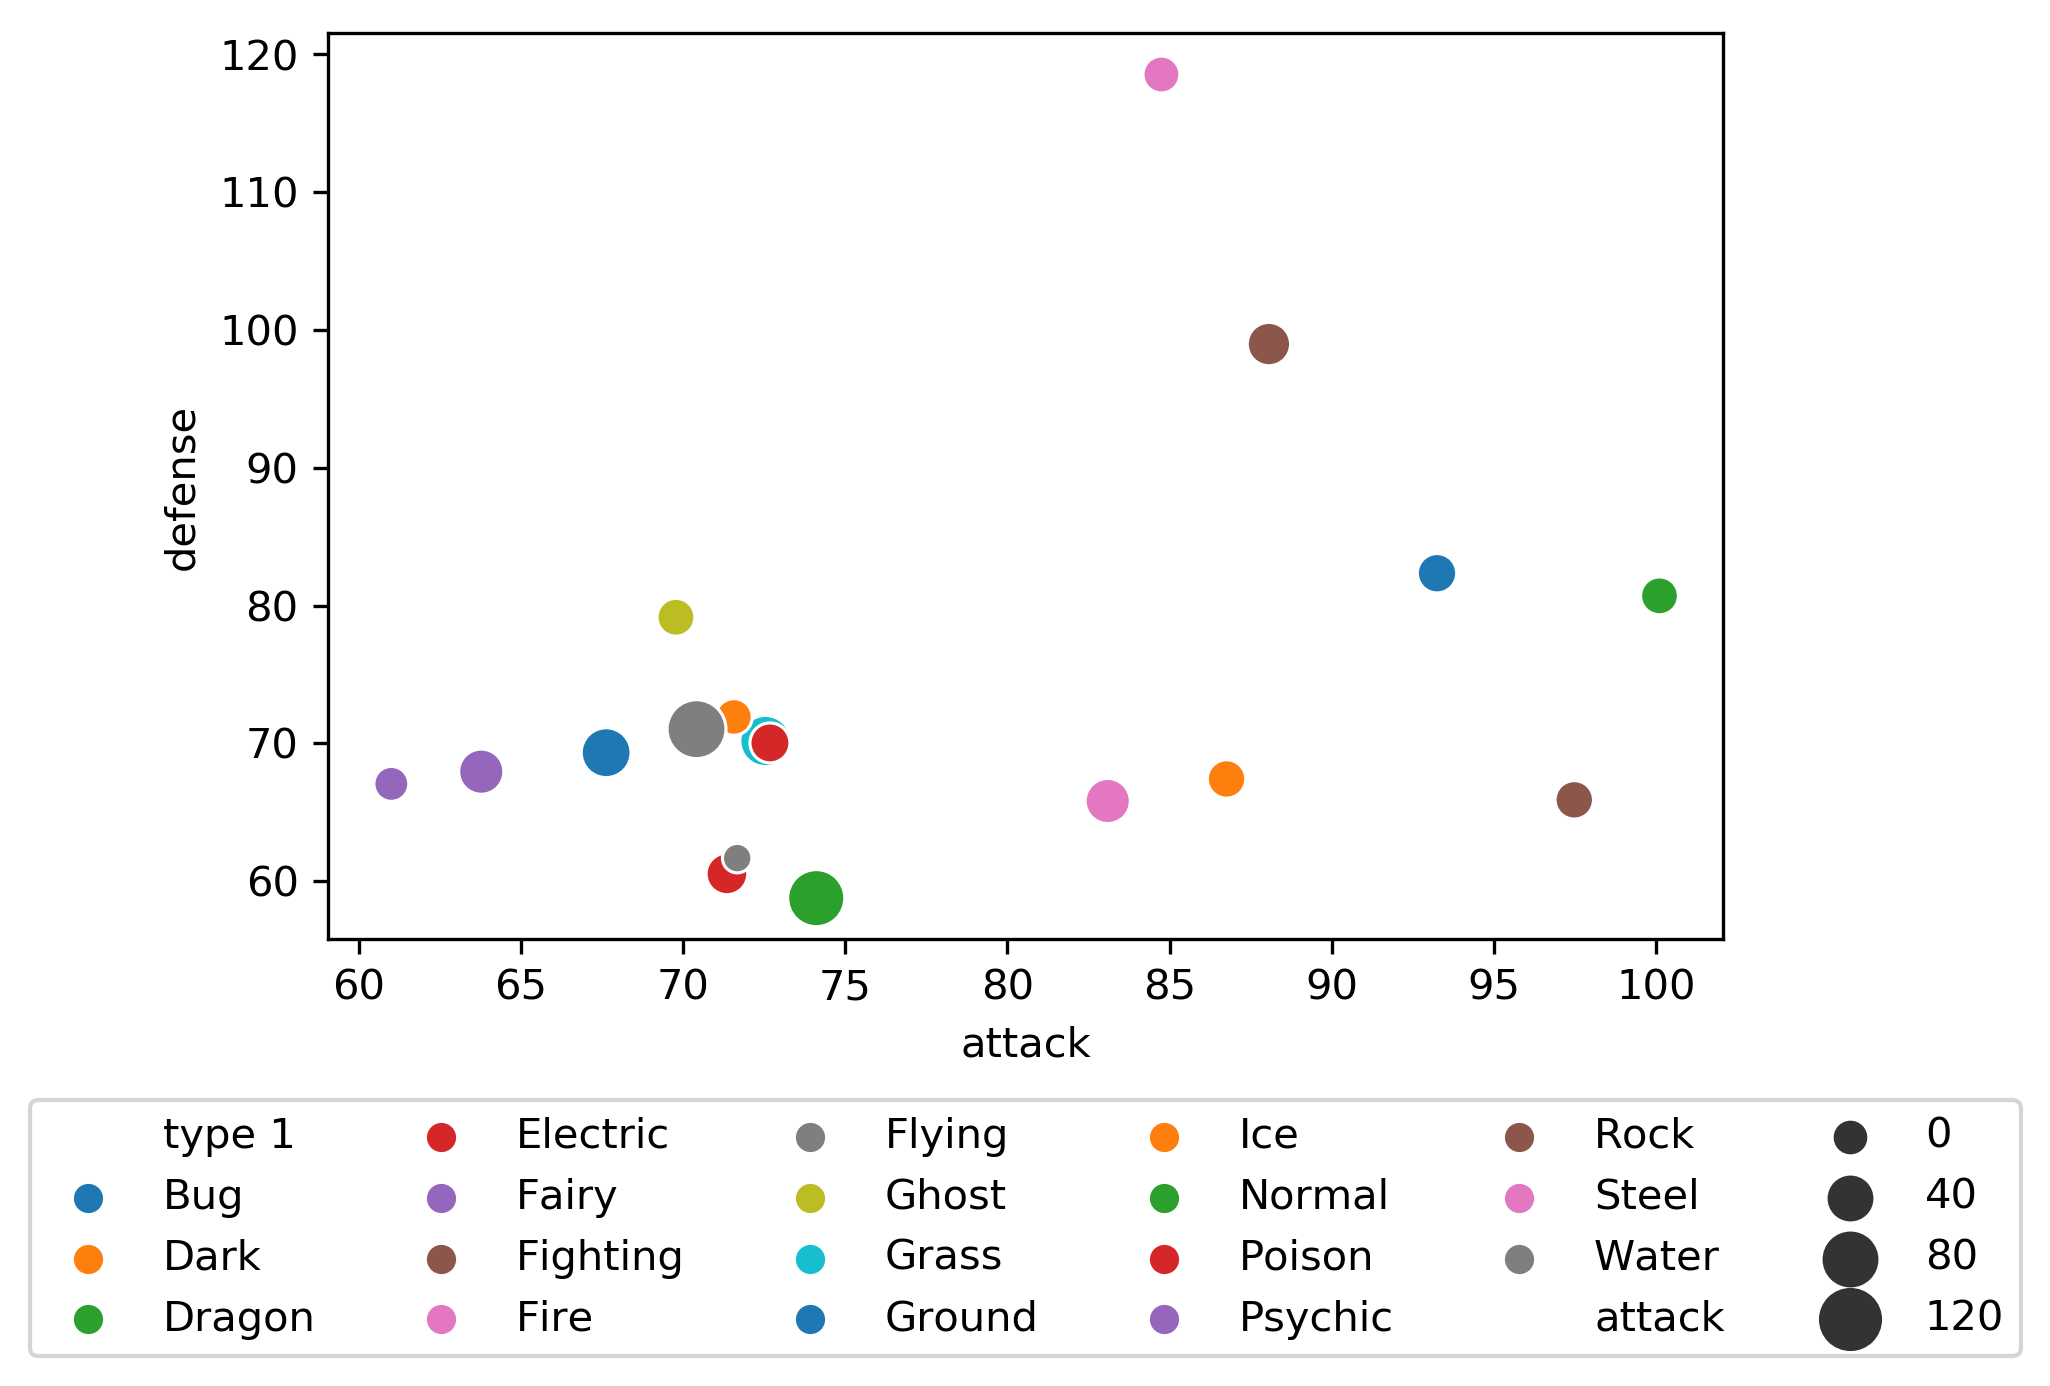

In [58]:
mpl.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(ncols=1, nrows=1)
sns.scatterplot(
            x =  pokemon_df.groupby("type 1")["attack"].mean(),  # na x-ové ose útok
            y =  pokemon_df.groupby("type 1")["defense"].mean(), # na y-ové ose obrana
            size=pokemon_df.groupby("type 1")["attack"].count(), # velikost je počet Pokémonů ve skupině
            hue= pokemon_df.groupby("type 1")["attack"].mean().index,  # barvy odlišují skupiy
            sizes=(50, 200),  # zvětší minimální a maximální velikost začek
            palette="tab10",  # nastaví barevné schéma, tab10 ~ tableau 10 je vhodné pro kategorická data
            ax=ax)
# posune legendu pod graf a rozloží popisky do šesti sloupců
ax.legend(loc="lower center", borderaxespad=-10, ncol=6)  

In [46]:
pokemon_df.groupby("type 1")["attack"].mean()

type 1
Bug          67.625000
Dark         86.758621
Dragon      100.111111
Electric     71.350000
Fairy        61.000000
Fighting     97.482759
Fire         83.094340
Flying       71.666667
Ghost        69.777778
Grass        72.538462
Ground       93.250000
Ice          71.565217
Normal       74.104762
Poison       72.676471
Psychic      63.773585
Rock         88.065217
Steel        84.750000
Water        70.412281
Name: attack, dtype: float64

In [18]:
pokemon_df.groupby("type 1")["attack"].count()

type 1
Bug          72
Dark         29
Dragon       27
Electric     40
Fairy        18
Fighting     29
Fire         53
Flying        3
Ghost        27
Grass        78
Ground       32
Ice          23
Normal      105
Poison       34
Psychic      53
Rock         46
Steel        24
Water       114
Name: attack, dtype: int64

In [19]:
pokemon_df.groupby("type 1")["attack"].count().index

Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object', name='type 1')